## Panggil Data Clean

In [2]:
#For 3.3.1
#Register Sedona Functions to Spark
from sedona.register import SedonaRegistrator
SedonaRegistrator.registerAll(spark)

True

In [3]:
#For 3.3.2
from shapely.geometry import Point, Polygon, mapping
import h3.api.numpy_int as h3int

In [4]:
import pandas as pd
from pyspark.sql import functions as F
from pyspark.sql.functions import col, when

In [5]:
# Path
base_path = "s3a://ungp-ais-data-historical-backup/user_temp/"
path_unique = base_path + "212112409/"

In [6]:
# Read Data
data_2019 = spark.read.parquet(path_unique + "data-ais-clean-2019.parquet")
data_2020 = spark.read.parquet(path_unique + "data-ais-clean-2020.parquet")
data_2021 = spark.read.parquet(path_unique + "data-ais-clean-2021.parquet")
data_2022 = spark.read.parquet(path_unique + "data-ais-clean-2022.parquet")
data_2023 = spark.read.parquet(path_unique + "data-ais-clean-2023.parquet")
data_2024 = spark.read.parquet(path_unique + "data-ais-clean-2024.parquet")

In [7]:
# Menghitung jumlah record pada setiap dataframe
count_2019 = data_2019.count()
count_2020 = data_2020.count()
count_2021 = data_2021.count()
count_2022 = data_2022.count()
count_2023 = data_2023.count()
count_2024 = data_2024.count()

# Menampilkan jumlah record untuk setiap tahun
print(f"Jumlah record data 2019: {count_2019}")
print(f"Jumlah record data 2020: {count_2020}")
print(f"Jumlah record data 2021: {count_2021}")
print(f"Jumlah record data 2022: {count_2022}")
print(f"Jumlah record data 2023: {count_2023}")
print(f"Jumlah record data 2024: {count_2024}")

Jumlah record data 2019: 173838255
Jumlah record data 2020: 201107160
Jumlah record data 2021: 172172918
Jumlah record data 2022: 220754005
Jumlah record data 2023: 258692300
Jumlah record data 2024: 410475975


In [7]:
# Mengambil nilai unik ShiptypeLevel5 per tahun
data_2019.select("ShiptypeLevel5").distinct().show(n=1000000, truncate=False)

+----------------------------------------------+
|ShiptypeLevel5                                |
+----------------------------------------------+
|Wood Chips Carrier                            |
|Platform Supply Ship                          |
|Container Ship (Fully Cellular)               |
|Chemical/Products Tanker                      |
|Crude/Oil Products Tanker                     |
|Yacht                                         |
|Anchor Handling Tug Supply                    |
|Fruit Juice Carrier, Refrigerated             |
|Fish Carrier                                  |
|LPG Tanker                                    |
|Fishing Vessel                                |
|Tug                                           |
|Standby Safety Vessel                         |
|Bulk Carrier                                  |
|LNG Tanker                                    |
|Vehicles Carrier                              |
|Products Tanker                               |
|General Cargo/Passe

In [8]:
data_2020.select("ShiptypeLevel5").distinct().show(n=1000000, truncate=False)

+-------------------------------------------------+
|ShiptypeLevel5                                   |
+-------------------------------------------------+
|Fish Factory Ship                                |
|Passenger/Ro-Ro Ship (Vehicles)                  |
|Platform Supply Ship                             |
|Trailing Suction Hopper Dredger                  |
|Container Ship (Fully Cellular)                  |
|Chemical/Products Tanker                         |
|Crude/Oil Products Tanker                        |
|Yacht                                            |
|Anchor Handling Tug Supply                       |
|Passenger/Ro-Ro Ship (Vehicles/Rail)             |
|Pipe Carrier                                     |
|LPG Tanker                                       |
|Heavy Load Carrier                               |
|FSO, Oil                                         |
|Fishing Vessel                                   |
|Tug                                              |
|Bulk Carrie

In [9]:
data_2021.select("ShiptypeLevel5").distinct().show(n=1000000, truncate=False)

+-------------------------------------------+
|ShiptypeLevel5                             |
+-------------------------------------------+
|Trailing Suction Hopper Dredger            |
|Container Ship (Fully Cellular)            |
|Research Survey Vessel                     |
|Chemical/Products Tanker                   |
|Chemical Tanker                            |
|Crude/Oil Products Tanker                  |
|Bulk Carrier, Self-discharging             |
|LPG Tanker                                 |
|Accommodation Pontoon, non-propelled       |
|Heavy Load Carrier                         |
|Fishing Vessel                             |
|Tug                                        |
|Bulk Carrier                               |
|LNG Tanker                                 |
|Vehicles Carrier                           |
|Products Tanker                            |
|Refrigerated Cargo Ship                    |
|General Cargo Ship (Open Hatch)            |
|Asphalt/Bitumen Tanker           

In [10]:
data_2022.select("ShiptypeLevel5").distinct().show(n=1000000, truncate=False)

+----------------------------------------------+
|ShiptypeLevel5                                |
+----------------------------------------------+
|Passenger/Ro-Ro Ship (Vehicles)               |
|Container Ship (Fully Cellular)               |
|Chemical/Products Tanker                      |
|Crude/Oil Products Tanker                     |
|Yacht                                         |
|Anchor Handling Tug Supply                    |
|LPG Tanker                                    |
|Tug                                           |
|Standby Safety Vessel                         |
|Bulk Carrier                                  |
|Vehicles Carrier                              |
|Products Tanker                               |
|General Cargo Ship (Open Hatch)               |
|Crude Oil Tanker                              |
|Bunkering Tanker (Oil)                        |
|General Cargo Ship                            |
|Crew/Supply Vessel                            |
|Landing Craft      

In [11]:
data_2023.select("ShiptypeLevel5").distinct().show(n=1000000, truncate=False)

+-------------------------------------------+
|ShiptypeLevel5                             |
+-------------------------------------------+
|Platform Supply Ship                       |
|Trailing Suction Hopper Dredger            |
|Container Ship (Fully Cellular)            |
|Cutter Suction Dredger                     |
|Drilling Rig, jack up                      |
|Chemical/Products Tanker                   |
|Chemical Tanker                            |
|Crude/Oil Products Tanker                  |
|Yacht                                      |
|Anchor Handling Tug Supply                 |
|LPG Tanker                                 |
|Fishing Vessel                             |
|Tug                                        |
|Bulk Carrier                               |
|LNG Tanker                                 |
|Vehicles Carrier                           |
|Products Tanker                            |
|Refrigerated Cargo Ship                    |
|General Cargo Ship (Open Hatch)  

In [12]:
data_2024.select("ShiptypeLevel5").distinct().show(n=1000000, truncate=False)

+-------------------------------------------+
|ShiptypeLevel5                             |
+-------------------------------------------+
|Passenger/Ro-Ro Ship (Vehicles)            |
|Container Ship (Fully Cellular)            |
|Cable Layer                                |
|Work/Repair Vessel                         |
|Chemical/Products Tanker                   |
|Crude/Oil Products Tanker                  |
|Fish Carrier                               |
|LPG Tanker                                 |
|Tug                                        |
|Bulk Carrier                               |
|Vehicles Carrier                           |
|Products Tanker                            |
|Refrigerated Cargo Ship                    |
|Crude Oil Tanker                           |
|Passenger/Cruise                           |
|Crew/Supply Vessel                         |
|General Cargo Ship                         |
|Landing Craft                              |
|FPSO, Oil                        

## Filter Kapal Pertambangan Penggalian

In [8]:
from functools import reduce
from pyspark.sql import functions as F

from pyspark.sql.functions import col

# Daftar ShiptypeLevel5 yang ingin difilter
ship_types = [
    "Ore Carrier",
    "Bulk/Caustic Soda Carrier (CABU)",
    "Bulk/Oil Carrier (OBO)",
    "Bulk/Sulphuric Acid Carrier",
    "Bulk/Oil/Chemical Carrier (CLEANBU)",
    "Ore/Oil Carrier",
    "Aggregates Carrier",
    "Limestone Carrier",
    "General Cargo/Tanker (Container/Oil/Bulk - COB Ship)",
    "Molten Sulphur Tanker",
    "CNG Tanker",
    "Combination Gas Tanker (LNG/LPG)",
    "LNG Tanker",
    "Liquefied Hydrogen Tanker",
    "LPG Tanker",
    "LPG/Chemical Tanker",
    "Asphalt/Bitumen Tanker",
    "Coal/Oil Mixture Tanker",
    "Crude Oil Tanker",
    "Crude/Oil Products Tanker",
    "Shuttle Tanker",
    "Products Tanker",
    "Tanker (Unspecified)",
    "Bitumen Tank Barge, Non Propelled",
    "Bulk Aggregates Barge, Non Propelled",
    "Crude Oil Tank Barge, Non Propelled",
    "Hopper Barge, Non Propelled",
    "LNG Tank Barge, Non Propelled",
    "LPG Tank Barge, Non Propelled",
    "LPG Tanker, Inland Waterways",
    "Oil Tanker, Inland Waterways",
    "Stone Carrier"
]

# Filter untuk setiap tahun dan tipe kapal yang mengandung salah satu kata kunci dalam ship_types
def filter_by_ship_types(data, ship_types):
    return data.filter(
        reduce(
            lambda a, b: a | F.col("ShiptypeLevel5").contains(b), 
            ship_types, 
            F.lit(False)
        )
    )

data_2019_filtered = filter_by_ship_types(data_2019, ship_types)
data_2020_filtered = filter_by_ship_types(data_2020, ship_types)
data_2021_filtered = filter_by_ship_types(data_2021, ship_types)
data_2022_filtered = filter_by_ship_types(data_2022, ship_types)
data_2023_filtered = filter_by_ship_types(data_2023, ship_types)
data_2024_filtered = filter_by_ship_types(data_2024, ship_types)

In [9]:
from pyspark.sql.functions import when, col

# Fungsi untuk mengklasifikasikan vessel_type berdasarkan ShiptypeLevel5
def classify_vessel_type(df):
    return df.withColumn(
        "vessel_type",
        when(
            col("ShiptypeLevel5").rlike(
                "Ore Carrier|Bulk/Caustic Soda Carrier \\(CABU\\)|Bulk/Oil Carrier \\(OBO\\)|"
                "Bulk/Sulphuric Acid Carrier|Bulk/Oil/Chemical Carrier \\(CLEANBU\\)|Ore/Oil Carrier|"
                "Aggregates Carrier|Limestone Carrier|General Cargo/Tanker \\(Container/Oil/Bulk - COB Ship\\)|"
                "Bulk Aggregates Barge, Non Propelled|Hopper Barge, Non Propelled|Stone Carrier"
            ), "Cargo"
        )
        .when(
            col("ShiptypeLevel5").rlike(
                "Molten Sulphur Tanker|CNG Tanker|Combination Gas Tanker \\(LNG/LPG\\)|LNG Tanker|"
                "Liquefied Hydrogen Tanker|LPG Tanker|LPG/Chemical Tanker|Asphalt/Bitumen Tanker|"
                "Coal/Oil Mixture Tanker|Crude Oil Tanker|Crude/Oil Products Tanker|Shuttle Tanker|"
                "Products Tanker|Tanker \\(Unspecified\\)|Bitumen Tank Barge, Non Propelled|"
                "Crude Oil Tank Barge, Non Propelled|LNG Tank Barge, Non Propelled|LPG Tank Barge, Non Propelled|"
                "LPG Tanker, Inland Waterways|Oil Tanker, Inland Waterways"
            ), "Tanker"
        )
        .otherwise("Unknown")  # Jika ada tipe yang tidak masuk kriteria, beri label 'Unknown'
    )

# Terapkan fungsi pada tiap dataset
data_2019_filtered = classify_vessel_type(data_2019_filtered)
data_2020_filtered = classify_vessel_type(data_2020_filtered)
data_2021_filtered = classify_vessel_type(data_2021_filtered)
data_2022_filtered = classify_vessel_type(data_2022_filtered)
data_2023_filtered = classify_vessel_type(data_2023_filtered)
data_2024_filtered = classify_vessel_type(data_2024_filtered)

In [9]:
data_2019_filtered.select("ShiptypeLevel5").distinct().show(n=1000000, truncate=False)

+-----------------------------------+
|ShiptypeLevel5                     |
+-----------------------------------+
|Chemical/Products Tanker           |
|Crude/Oil Products Tanker          |
|LPG Tanker                         |
|LNG Tanker                         |
|Products Tanker                    |
|Asphalt/Bitumen Tanker             |
|Crude Oil Tanker                   |
|Ore Carrier                        |
|Aggregates Carrier                 |
|Limestone Carrier                  |
|Bulk/Caustic Soda Carrier (CABU)   |
|Combination Gas Tanker (LNG/LPG)   |
|Shuttle Tanker                     |
|Molten Sulphur Tanker              |
|Bulk/Sulphuric Acid Carrier        |
|Ore/Oil Carrier                    |
|LPG/Chemical Tanker                |
|Bulk/Oil/Chemical Carrier (CLEANBU)|
|Stone Carrier                      |
|Bulk/Oil Carrier (OBO)             |
+-----------------------------------+



In [10]:
data_2020_filtered.select("ShiptypeLevel5").distinct().show(n=1000000, truncate=False)

+-----------------------------------+
|ShiptypeLevel5                     |
+-----------------------------------+
|Shuttle Tanker                     |
|Chemical/Products Tanker           |
|Crude/Oil Products Tanker          |
|LPG Tanker                         |
|LNG Tanker                         |
|Products Tanker                    |
|Crude Oil Tanker                   |
|Aggregates Carrier                 |
|Ore Carrier                        |
|Bulk/Oil/Chemical Carrier (CLEANBU)|
|Asphalt/Bitumen Tanker             |
|Bulk/Caustic Soda Carrier (CABU)   |
|Molten Sulphur Tanker              |
|LPG/Chemical Tanker                |
|Limestone Carrier                  |
|Stone Carrier                      |
|Ore/Oil Carrier                    |
|Bulk/Sulphuric Acid Carrier        |
|Combination Gas Tanker (LNG/LPG)   |
|Bulk/Oil Carrier (OBO)             |
+-----------------------------------+



In [11]:
data_2021_filtered.select("ShiptypeLevel5").distinct().show(n=1000000, truncate=False)

+-----------------------------------+
|ShiptypeLevel5                     |
+-----------------------------------+
|Chemical/Products Tanker           |
|Crude/Oil Products Tanker          |
|LPG Tanker                         |
|LNG Tanker                         |
|Products Tanker                    |
|Asphalt/Bitumen Tanker             |
|Crude Oil Tanker                   |
|Ore Carrier                        |
|Aggregates Carrier                 |
|Ore/Oil Carrier                    |
|Molten Sulphur Tanker              |
|Bulk/Oil Carrier (OBO)             |
|Limestone Carrier                  |
|Bulk/Caustic Soda Carrier (CABU)   |
|Shuttle Tanker                     |
|Bulk/Oil/Chemical Carrier (CLEANBU)|
|Stone Carrier                      |
|LPG/Chemical Tanker                |
|Combination Gas Tanker (LNG/LPG)   |
+-----------------------------------+



In [12]:
data_2022_filtered.select("ShiptypeLevel5").distinct().show(n=1000000, truncate=False)

+------------------------------------------+
|ShiptypeLevel5                            |
+------------------------------------------+
|Chemical/Products Tanker                  |
|Crude/Oil Products Tanker                 |
|LPG Tanker                                |
|Products Tanker                           |
|Crude Oil Tanker                          |
|Ore Carrier                               |
|LNG Tanker                                |
|Asphalt/Bitumen Tanker                    |
|Bulk/Caustic Soda Carrier (CABU)          |
|Shuttle Tanker                            |
|Aggregates Carrier                        |
|Molten Sulphur Tanker                     |
|Limestone Carrier                         |
|Bulk/Oil/Chemical Carrier (CLEANBU)       |
|Combination Gas Tanker (LNG/LPG)          |
|Bulk/Oil Carrier (OBO)                    |
|Chemical/Products Tanker, Inland Waterways|
|Ore/Oil Carrier                           |
|LPG/Chemical Tanker                       |
|Stone Car

In [13]:
data_2023_filtered.select("ShiptypeLevel5").distinct().show(n=1000000, truncate=False)

+-----------------------------------+
|ShiptypeLevel5                     |
+-----------------------------------+
|Chemical/Products Tanker           |
|Crude/Oil Products Tanker          |
|LPG Tanker                         |
|LNG Tanker                         |
|Products Tanker                    |
|Crude Oil Tanker                   |
|Ore Carrier                        |
|Aggregates Carrier                 |
|Asphalt/Bitumen Tanker             |
|Shuttle Tanker                     |
|Bulk/Caustic Soda Carrier (CABU)   |
|Limestone Carrier                  |
|Liquefied Hydrogen Tanker          |
|LPG/Chemical Tanker                |
|Stone Carrier                      |
|Molten Sulphur Tanker              |
|Ore/Oil Carrier                    |
|Bulk/Oil/Chemical Carrier (CLEANBU)|
|Combination Gas Tanker (LNG/LPG)   |
+-----------------------------------+



In [14]:
data_2024_filtered.select("ShiptypeLevel5").distinct().show(n=1000000, truncate=False)

+-----------------------------------+
|ShiptypeLevel5                     |
+-----------------------------------+
|Shuttle Tanker                     |
|Chemical/Products Tanker           |
|LPG Tanker                         |
|LNG Tanker                         |
|Products Tanker                    |
|Asphalt/Bitumen Tanker             |
|Crude Oil Tanker                   |
|Ore Carrier                        |
|Aggregates Carrier                 |
|Crude/Oil Products Tanker          |
|Molten Sulphur Tanker              |
|Bulk/Caustic Soda Carrier (CABU)   |
|Ore/Oil Carrier                    |
|Limestone Carrier                  |
|LPG/Chemical Tanker                |
|Stone Carrier                      |
|Combination Gas Tanker (LNG/LPG)   |
|Bulk/Oil/Chemical Carrier (CLEANBU)|
|CNG Tanker                         |
+-----------------------------------+



In [15]:
data_2019_filtered.select("vessel_type").distinct().show(n=1000000, truncate=False)

+-----------+
|vessel_type|
+-----------+
|Tanker     |
|Cargo      |
+-----------+



In [16]:
data_2020_filtered.select("vessel_type").distinct().show(n=1000000, truncate=False)

+-----------+
|vessel_type|
+-----------+
|Tanker     |
|Cargo      |
+-----------+



In [17]:
data_2021_filtered.select("vessel_type").distinct().show(n=1000000, truncate=False)

+-----------+
|vessel_type|
+-----------+
|Tanker     |
|Cargo      |
+-----------+



In [18]:
data_2022_filtered.select("vessel_type").distinct().show(n=1000000, truncate=False)

+-----------+
|vessel_type|
+-----------+
|Tanker     |
|Cargo      |
+-----------+



In [19]:
data_2023_filtered.select("vessel_type").distinct().show(n=1000000, truncate=False)

+-----------+
|vessel_type|
+-----------+
|Tanker     |
|Cargo      |
+-----------+



In [20]:
data_2024_filtered.select("vessel_type").distinct().show(n=1000000, truncate=False)

+-----------+
|vessel_type|
+-----------+
|Tanker     |
|Cargo      |
+-----------+



In [21]:
# Save Data
data_2019_filtered.write.option("header", True).mode("overwrite").parquet(path_unique + "data-filter-clean-2019.parquet")
data_2020_filtered.write.option("header", True).mode("overwrite").parquet(path_unique + "data-filter-clean-2020.parquet")
data_2021_filtered.write.option("header", True).mode("overwrite").parquet(path_unique + "data-filter-clean-2021.parquet")

In [22]:
# Save Data
data_2022_filtered.write.option("header", True).mode("overwrite").parquet(path_unique + "data-filter-clean-2022.parquet")
data_2023_filtered.write.option("header", True).mode("overwrite").parquet(path_unique + "data-filter-clean-2023.parquet")
data_2024_filtered.write.option("header", True).mode("overwrite").parquet(path_unique + "data-filter-clean-2024.parquet")

## Eksplorasi

In [20]:
# Menyusun data jumlah kapal per tahun
table_vessel = spark.createDataFrame([
    {"Tahun": 2019, "Jumlah Kapal": data_2019.select("mmsi").distinct().count()},
    {"Tahun": 2020, "Jumlah Kapal": data_2020.select("mmsi").distinct().count()},
    {"Tahun": 2021, "Jumlah Kapal": data_2021.select("mmsi").distinct().count()},
    {"Tahun": 2022, "Jumlah Kapal": data_2022.select("mmsi").distinct().count()},
    {"Tahun": 2023, "Jumlah Kapal": data_2023.select("mmsi").distinct().count()},
    {"Tahun": 2024, "Jumlah Kapal": data_2024.select("mmsi").distinct().count()}
])

# Menampilkan hasil
table_vessel.show()

+------------+-----+
|Jumlah Kapal|Tahun|
+------------+-----+
|       34888| 2019|
|       41443| 2020|
|       26310| 2021|
|       27280| 2022|
|       28975| 2023|
|       30807| 2024|
+------------+-----+



In [21]:
# Menyusun data jumlah kapal per tahun
table_vessel = spark.createDataFrame([
    {"Tahun": 2019, "Jumlah Kapal": data_2019_filtered.select("mmsi").distinct().count()},
    {"Tahun": 2020, "Jumlah Kapal": data_2020_filtered.select("mmsi").distinct().count()},
    {"Tahun": 2021, "Jumlah Kapal": data_2021_filtered.select("mmsi").distinct().count()},
    {"Tahun": 2022, "Jumlah Kapal": data_2022_filtered.select("mmsi").distinct().count()},
    {"Tahun": 2023, "Jumlah Kapal": data_2023_filtered.select("mmsi").distinct().count()},
    {"Tahun": 2024, "Jumlah Kapal": data_2024_filtered.select("mmsi").distinct().count()}
])

# Menampilkan hasil
table_vessel.show()

+------------+-----+
|Jumlah Kapal|Tahun|
+------------+-----+
|       10117| 2019|
|       15035| 2020|
|        7273| 2021|
|        7470| 2022|
|        7606| 2023|
|        7729| 2024|
+------------+-----+



In [10]:
# Menyusun data jumlah kapal per tahun
table_vessel = spark.createDataFrame([
    {"Tahun": 2019, "Jumlah Data": data_2019.count()},
    {"Tahun": 2020, "Jumlah Data": data_2020.count()},
    {"Tahun": 2021, "Jumlah Data": data_2021.count()},
    {"Tahun": 2022, "Jumlah Data": data_2022.count()},
    {"Tahun": 2023, "Jumlah Data": data_2023.count()},
    {"Tahun": 2024, "Jumlah Data": data_2024.count()}
])

# Menampilkan hasil
table_vessel.show()

+-----------+-----+
|Jumlah Data|Tahun|
+-----------+-----+
|  173838255| 2019|
|  201107160| 2020|
|  172172918| 2021|
|  220754005| 2022|
|  258692300| 2023|
|  410475975| 2024|
+-----------+-----+



In [9]:
# Menyusun data jumlah kapal per tahun
table_vessel = spark.createDataFrame([
    {"Tahun": 2019, "Jumlah Data": data_2019_filtered.count()},
    {"Tahun": 2020, "Jumlah Data": data_2020_filtered.count()},
    {"Tahun": 2021, "Jumlah Data": data_2021_filtered.count()},
    {"Tahun": 2022, "Jumlah Data": data_2022_filtered.count()},
    {"Tahun": 2023, "Jumlah Data": data_2023_filtered.count()},
    {"Tahun": 2024, "Jumlah Data": data_2024_filtered.count()}
])

# Menampilkan hasil
table_vessel.show()

+-----------+-----+
|Jumlah Data|Tahun|
+-----------+-----+
|   47289609| 2019|
|   58585778| 2020|
|   52669580| 2021|
|   69110476| 2022|
|   76665065| 2023|
|  118582923| 2024|
+-----------+-----+



In [9]:
from pyspark.sql.functions import col

# Ambil MMSI unik dari setiap dataframe dengan collect()
mmsi_2019 = set(data_2019_filtered.select("mmsi").distinct().rdd.flatMap(lambda x: x).collect())
mmsi_2020 = set(data_2020_filtered.select("mmsi").distinct().rdd.flatMap(lambda x: x).collect())
mmsi_2021 = set(data_2021_filtered.select("mmsi").distinct().rdd.flatMap(lambda x: x).collect())
mmsi_2022 = set(data_2022_filtered.select("mmsi").distinct().rdd.flatMap(lambda x: x).collect())
mmsi_2023 = set(data_2023_filtered.select("mmsi").distinct().rdd.flatMap(lambda x: x).collect())
mmsi_2024 = set(data_2024_filtered.select("mmsi").distinct().rdd.flatMap(lambda x: x).collect())

# Cari MMSI yang ada di semua dataframe (intersection)
common_mmsi = mmsi_2019 & mmsi_2020 & mmsi_2021 & mmsi_2022 & mmsi_2023 & mmsi_2024

# Konversi MMSI yang ditemukan menjadi DataFrame PySpark
common_mmsi_df = spark.createDataFrame([(mmsi,) for mmsi in common_mmsi], ["mmsi"])

# Gabungkan dengan data_2024_filtered untuk mendapatkan ShiptypeLevel5
common_mmsi_with_shiptype = common_mmsi_df.join(
    data_2024_filtered.select("mmsi", "ShiptypeLevel5"),  # Pilih hanya kolom yang diperlukan
    "mmsi",
    "left"
)

# Tampilkan hasil
# Menampilkan hasil dengan MMSI unik
common_mmsi_with_shiptype.distinct().show(10000,truncate=False)

+---------+-----------------------------------+
|mmsi     |ShiptypeLevel5                     |
+---------+-----------------------------------+
|205764000|Crude Oil Tanker                   |
|219182000|Chemical/Products Tanker           |
|225420000|LNG Tanker                         |
|235094793|Ore Carrier                        |
|235113773|Chemical/Products Tanker           |
|235118625|Ore Carrier                        |
|240221000|Crude Oil Tanker                   |
|240820000|Crude Oil Tanker                   |
|240836000|Crude Oil Tanker                   |
|241352000|LNG Tanker                         |
|241390000|Crude Oil Tanker                   |
|253588000|Products Tanker                    |
|258689000|Chemical/Products Tanker           |
|273414670|Chemical/Products Tanker           |
|309333000|LNG Tanker                         |
|310499000|LNG Tanker                         |
|310696000|LNG Tanker                         |
|311000686|Crude Oil Tanker             

In [10]:
import pandas as pd

# Load file pickle
ports_df = pd.read_pickle(path_unique + "ports_df_merged_v2.pkl")

# Cek isi data
print(ports_df.head())

     Country                                    Port    prov  \
0  Indonesia                                  Adaut   Maluku   
1  Indonesia                             Air Buaya    Maluku   
2  Indonesia                   Kobisadar  - Amahai    Maluku   
3  Indonesia                               Ambalau    Maluku   
4  Indonesia  Ambon   - Batu Merah  - Gudang Arang    Maluku   

               kabkot      port_id  \
0  Kepulauan Tanimbar          568   
1              Buru            524   
2      Maluku Tengah       561-556   
3       Buru Selatan           528   
4             Ambon    520-521-522   

                                    boundary_polygon  \
0  POLYGON ((131.15761 -8.08341, 131.15810 -8.173...   
1  POLYGON ((126.27207 -3.12758, 126.27183 -3.217...   
2  POLYGON ((128.96551 -3.38394, 128.87548 -3.383...   
3  POLYGON ((127.22340 -3.78009, 127.22322 -3.870...   
4  POLYGON ((128.20878 -3.74725, 128.11873 -3.747...   

                                         boundary

/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, 

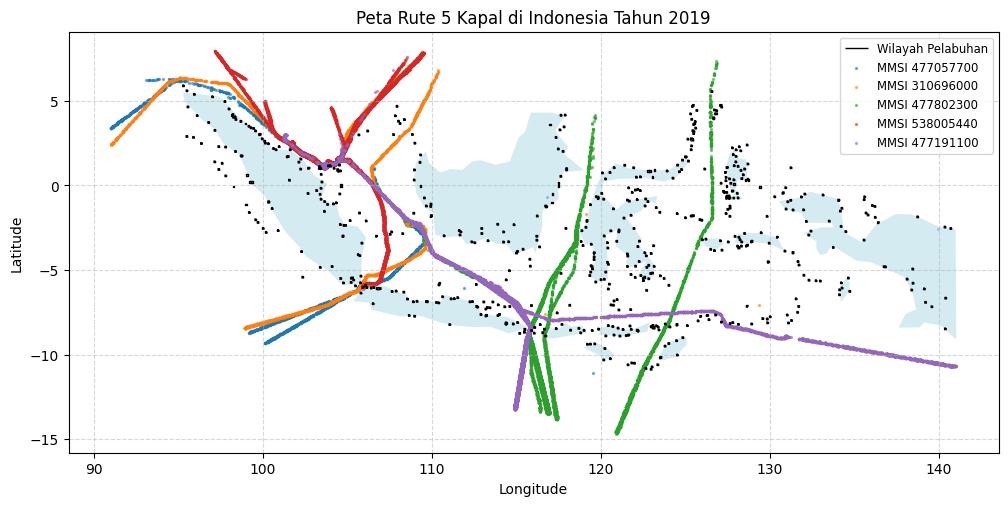

/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, 

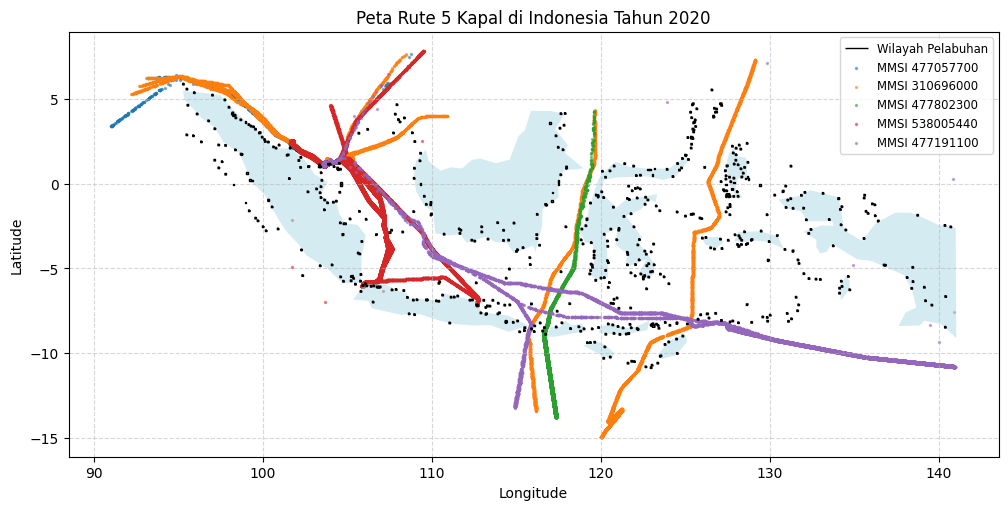

/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, 

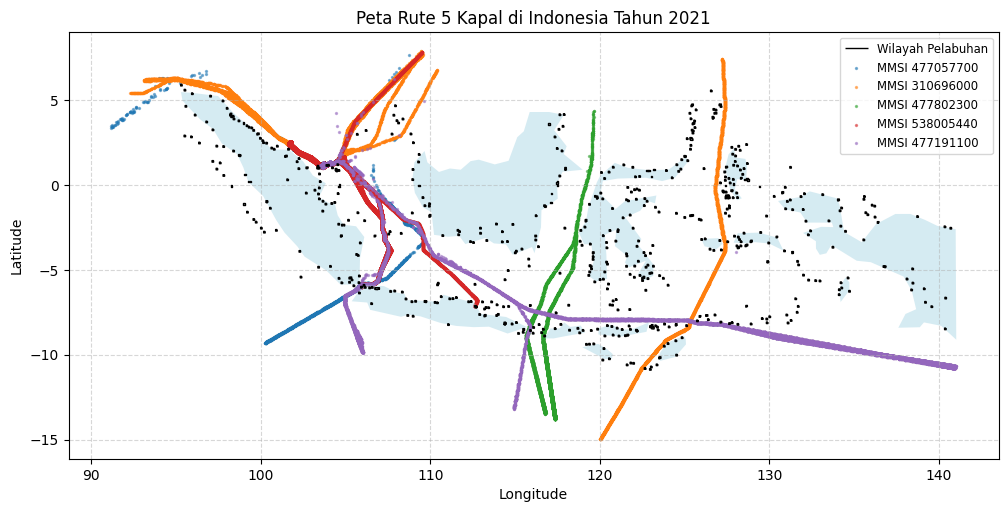

/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, 

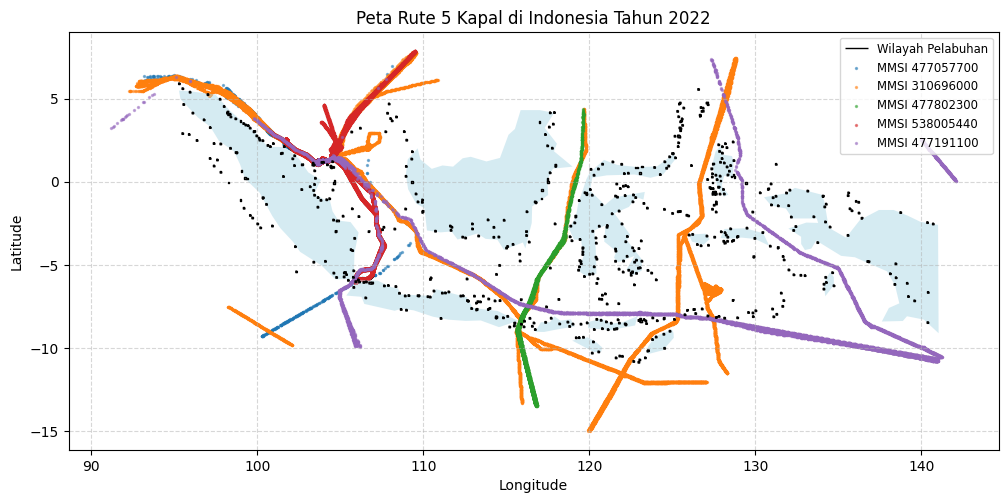

/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, 

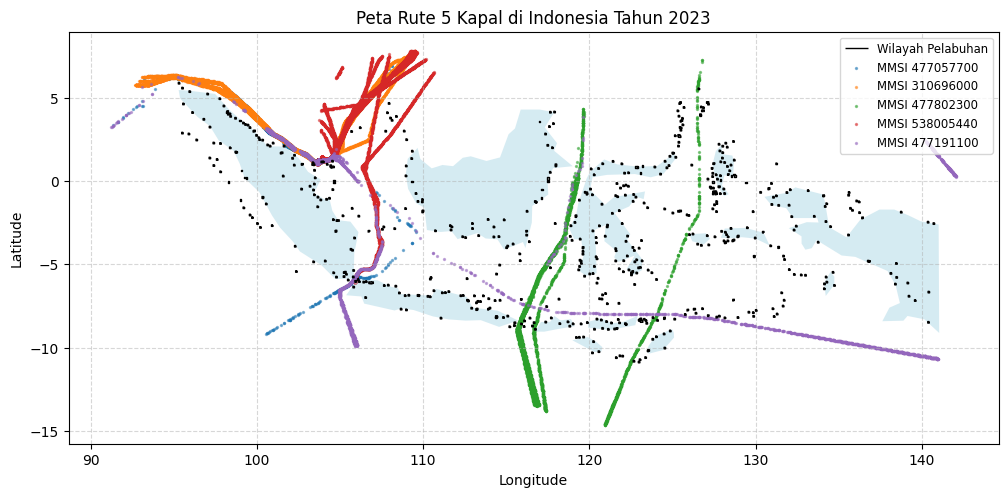

/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, 

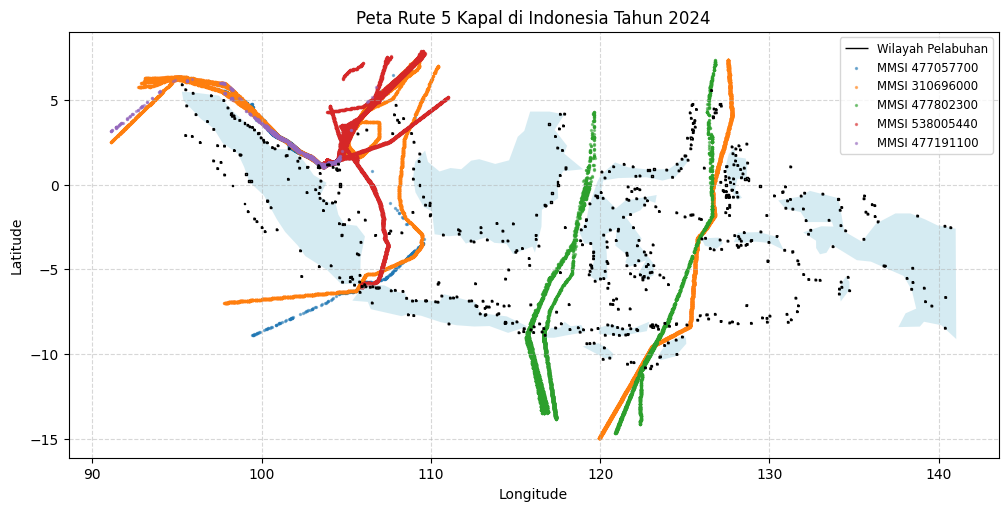

In [20]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

# 1️⃣ Load data wilayah pelabuhan
gdf_ports = gpd.GeoDataFrame(ports_df, geometry="boundary_polygon")

# 2️⃣ Load data kapal untuk masing-masing tahun
data_filtered_list = [data_2019_filtered, data_2020_filtered, data_2021_filtered, 
                      data_2022_filtered, data_2023_filtered, data_2024_filtered]

tahun_list = ["2019", "2020", "2021", "2022", "2023", "2024"]

# Pilih MMSI yang diinginkan
mmsi_selected = [477057700, 310696000, 477802300, 538005440, 477191100]

# 3️⃣ Loop untuk setiap tahun (gambar terpisah)
for df_filtered, tahun in zip(data_filtered_list, tahun_list):
    fig, ax = plt.subplots(figsize=(12, 6))  # Satu peta per gambar

    # Ambil data kapal yang sesuai
    df_selected = df_filtered.filter(F.col("mmsi").isin(mmsi_selected))  # Untuk PySpark

    # Konversi ke Pandas untuk plotting
    df_selected_pd = df_selected.toPandas()
    df_selected_pd["longitude"] = pd.to_numeric(df_selected_pd["longitude"], errors="coerce")
    df_selected_pd["latitude"] = pd.to_numeric(df_selected_pd["latitude"], errors="coerce")

    # 4️⃣ Plot wilayah pelabuhan
    gdf_ports.boundary.plot(ax=ax, color="black", linewidth=1, label="Wilayah Pelabuhan")
    gdf_ports.plot(ax=ax, color="gray", alpha=0.4)  # Isi pelabuhan

    # 5️⃣ Plot titik kapal untuk setiap MMSI
    for mmsi in mmsi_selected:
        subset = df_selected_pd[df_selected_pd["mmsi"] == mmsi]

        ax.scatter(
            subset["longitude"],  # Longitude di X-axis
            subset["latitude"],  # Latitude di Y-axis
            s=2,  
            label=f"MMSI {mmsi}", 
            alpha=0.5
        )

    # 6️⃣ Tambahkan peta latar belakang (Opsional)
    try:
        world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
        world[world.name == "Indonesia"].plot(ax=ax, color="lightblue", alpha=0.5)
    except:
        print(f"Shapefile peta dunia tidak ditemukan untuk {tahun}.")

    # 7️⃣ Tambahkan keterangan
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.legend(loc="upper right", fontsize="small")
    ax.set_title(f"Peta Rute 5 Kapal di Indonesia Tahun {tahun}")
    ax.grid(True, linestyle="--", alpha=0.5)

    # 8️⃣ Tampilkan peta (gambar terpisah)
    plt.show()

In [22]:
!pip install plotly

Closing down clientserver connection
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 92.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 60.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import geopandas as gpd
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from pyspark.sql import functions as F

# 1️⃣ Load data wilayah pelabuhan
gdf_ports = gpd.GeoDataFrame(ports_df, geometry="boundary_polygon")

# 2️⃣ Load data kapal untuk masing-masing tahun
data_filtered_list = [data_2019_filtered, data_2020_filtered, data_2021_filtered, 
                      data_2022_filtered, data_2023_filtered, data_2024_filtered]

tahun_list = ["2019", "2020", "2021", "2022", "2023", "2024"]

# Pilih MMSI yang diinginkan
mmsi_selected = [477057700, 310696000, 477802300, 538005440, 477191100]

# 3️⃣ Loop untuk setiap tahun (gambar terpisah)
for df_filtered, tahun in zip(data_filtered_list, tahun_list):

    # Ambil data kapal yang sesuai
    df_selected = df_filtered.filter(F.col("mmsi").isin(mmsi_selected))  # Untuk PySpark

    # Konversi ke Pandas untuk plotting
    df_selected_pd = df_selected.toPandas()
    df_selected_pd["longitude"] = pd.to_numeric(df_selected_pd["longitude"], errors="coerce")
    df_selected_pd["latitude"] = pd.to_numeric(df_selected_pd["latitude"], errors="coerce")

    # 4️⃣ Buat DataFrame GeoJSON untuk Pelabuhan
    geojson_ports = gdf_ports.__geo_interface__

    # 5️⃣ Plot dengan Plotly
    fig = px.scatter_mapbox(
        df_selected_pd,
        lat="latitude",
        lon="longitude",
        color="mmsi",  # Warna berbeda untuk setiap MMSI
        size=[2] * len(df_selected_pd),  # Ukuran titik seragam
        hover_data=["mmsi"],  # Menampilkan MMSI saat hover
        title=f"Peta Rute 5 Kapal di Indonesia Tahun {tahun}",
    )

    # 6️⃣ Tambahkan Wilayah Pelabuhan sebagai Layer
    fig.add_trace(
        go.Choroplethmapbox(
            geojson=geojson_ports,
            locations=[0] * len(gdf_ports),  # Dummy ID
            z=[0] * len(gdf_ports),  # Dummy Value
            colorscale=["gray", "gray"],
            showscale=False,
            opacity=0.4,
        )
    )

    # 7️⃣ Konfigurasi Peta
    fig.update_layout(
        mapbox_style="carto-positron",
        mapbox_zoom=5,
        mapbox_center={"lat": df_selected_pd["latitude"].mean(), "lon": df_selected_pd["longitude"].mean()},
        margin={"r":0, "t":40, "l":0, "b":0},
        legend_title="MMSI",
    )

    # 8️⃣ Tampilkan Peta Interaktif
    fig.show()

Error while sending or receiving.
Traceback (most recent call last):
  File "/opt/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/clientserver.py", line 503, in send_command
    self.socket.sendall(command.encode("utf-8"))
ConnectionResetError: [Errno 104] Connection reset by peer
Closing down clientserver connection
Exception while sending command.
Traceback (most recent call last):
  File "/opt/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/clientserver.py", line 503, in send_command
    self.socket.sendall(command.encode("utf-8"))
ConnectionResetError: [Errno 104] Connection reset by peer

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/opt/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/clientserver.py", line 506, in send_command
    raise Py4JNetworkError(
py4j.protocol.Py4JNetwor

In [24]:
spark.stop()

Error occurred while attempting Spark job cancellation when interrupting the kernel: 'NoneType' object has no attribute 'sc'
